<a href="https://colab.research.google.com/github/Mohinee29/superstore-sales/blob/main/Pandas_SalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PANDAS SUPERSTORE_SALES ANALYSIS

##OBJECTIVES 












*   What is the sales trend
*   Top 10 products by sales
*   What is the top selling products


*   What is the top profit making product
*   What is the most profitable category and subcategory 


*   What is the preffered ship mode
*   Top segemnet of customers and Profit from them.
*   TOP 5 COUNTRIES BY SALES and profit of those countries


*   REGION WITH MOST SALES AND PROFIT OF THOSE REGIONS
*   Region with most profitable business



*   Top 5 countries offered highest discount and respective profits from them
*   Top 5 subcategory sales and respective states








## DATA LOADING 

In [6]:
# IMPORTING LIBRARAIES
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import numpy as np

import datetime


import io

import xlrd



In [29]:
url = "https://github.com/Mohinee29/superstore-sales/blob/main/superstore_sales.xlsx?raw=true"
df = pd.read_excel(url,sheet_name="Orders",engine=None)


### DATA AUDIT

In [ ]:
#Print first 5 rows
df.head(5)

In [ ]:
#Print last 5 rows
df.tail(5)

In [ ]:
#shape of the data set
df.shape

In [ ]:
#type of data in each column
df.info()

In [ ]:
#Name of columns present in  the data set
df.columns

In [ ]:
#checking missing values in data set
# sum() returns the total number of missing value in each column
df.isnull().sum()

In [ ]:
df.describe()

In [ ]:
# check for duplicated rows in data 
df.duplicated().sum()

##EXPLORATORY DATA ANALYSIS

###WHAT IS THE OVERALL SALES TREND




In [ ]:
#Checks from which date the data is available
df["order_date"].min()

Timestamp('2011-01-01 00:00:00')

In [ ]:
#Checks upto which date the data is available
df["order_date"].max()

Timestamp('2014-12-31 00:00:00')

OBSERVATION: 
Sales data is available for january 2011 to december 2014, i.e for 4 years

In [ ]:
# MAKE A SEPARATE COLUMN FOR YEAR FROM ORDER_DATE
df['year'] = pd.DatetimeIndex(df['order_date']).year

In [ ]:
#MAKE A SEPARATE COLUMN FOR MONTH FROM ORDER_DATE
df['month'] = pd.DatetimeIndex(df["order_date"]).month

In [36]:
#MAKE A SEPARATE COLUMN FOR MONTH AND YEAR FROM ORDER_DATE
df['month_year'] = pd.to_datetime(df['order_date']).dt.to_period('M')


In [ ]:
 df_yearTrend = df.groupby("year").sum()["sales"].reset_index()
 df_yearTrend["sales"] = df_yearTrend["sales"].astype(str)
 


In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df_yearTrend["year"],df_yearTrend["sales"])
plt.xticks(rotation = "vertical",size = 9)
plt.show()

Observation : On an average the sales is increasing from 2011 to 2014

In [37]:
df_monthly_trend = df.groupby("month_year").sum()["sales"].reset_index()
df_monthly_trend["month_year"] =df_monthly_trend["month_year"].astype(str)    # CHANGING DATA TYPE TO STRING

In [ ]:
#PLOTTING THE SALES BASED ON MONTH AND YEAR

plt.figure(figsize=(15,6))
plt.plot(df_monthly_trend["month_year"],df_monthly_trend["sales"])
plt.xticks(rotation = "vertical",size = 8)
plt.show()

###Top 10 Products By sales

In [ ]:
prod_sales = pd.DataFrame(df.groupby("product_name").sum()['sales'])

prod_sales_Top = prod_sales.sort_values("sales",ascending= False)[:10]

prod_sales_Top

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


<Figure size 1440x2160 with 0 Axes>

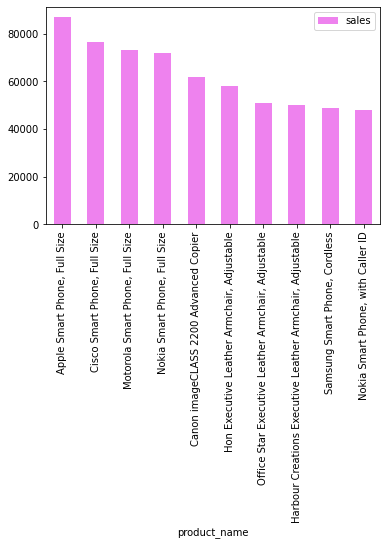

In [ ]:
plt.figure(figsize=(20,30))
prod_sales_Top.plot.bar(color = "violet")
plt.show()

###Top 10 Products By quantity sold

In [ ]:
product_quantity = df.groupby(["product_name"]).sum()['quantity'].reset_index().sort_values("quantity",ascending= False)[:10]
product_quantity



,product_name,quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
3335,"Stockwell Paper Clips, Assorted Sizes",253
446,"Avery Index Tab, Clear",252
1981,"Ibico Index Tab, Clear",251
3179,"Smead File Cart, Single Width",250
3266,"Stanley Pencil Sharpener, Water Color",242


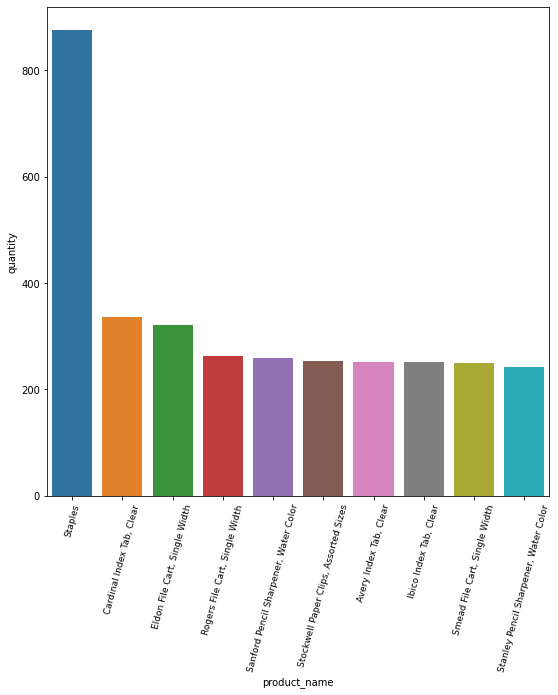

In [ ]:
plt.figure(figsize=(9,9))
sns.barplot(x="product_name",y="quantity",data=product_quantity)
plt.xticks(rotation = "75",size = 9)
plt.show()

###TOP 10 PRODUCTS BY PROFIT

In [38]:
product_profit = df.groupby(["product_name"]).sum()['profit'].reset_index().sort_values("profit",ascending= False)[:10]
product_profit

,product_name,profit
866,Canon imageCLASS 2200 Advanced Copier,25199.9280
970,"Cisco Smart Phone, Full Size",17238.5206
2415,"Motorola Smart Phone, Full Size",17027.1130
1926,"Hoover Stove, Red",11807.9690
3098,"Sauder Classic Bookcase, Traditional",10672.0730
1714,"Harbour Creations Executive Leather Armchair, ...",10427.3260
2501,"Nokia Smart Phone, Full Size",9938.1955
971,"Cisco Smart Phone, with Caller ID",9786.6408
2502,"Nokia Smart Phone, with Caller ID",9465.3257
589,"Belkin Router, USB",8955.0180


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


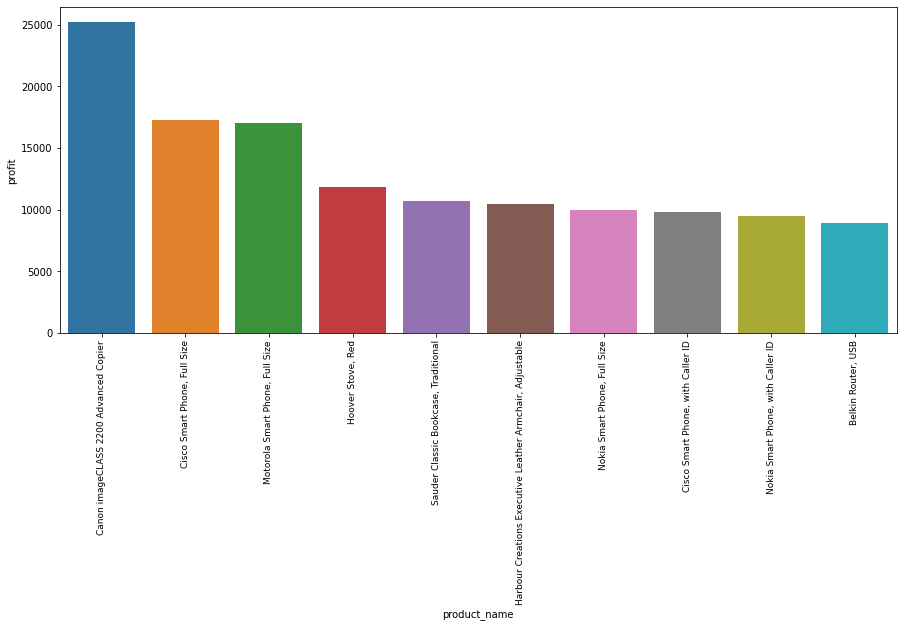

In [39]:
plt.figure(figsize=(15,6))
sns.barplot(product_profit["product_name"],product_profit["profit"])
plt.xticks(rotation = "vertical",size = 9)
plt.show()

###PREFERED SHIP MODE

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


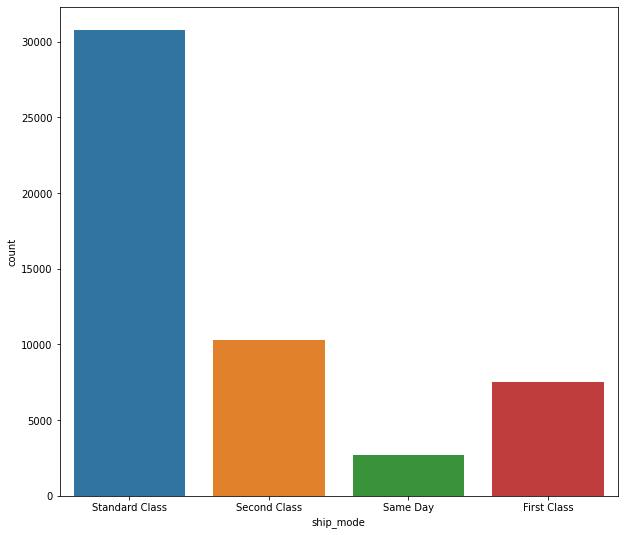

In [40]:
plt.figure(figsize=(10,9))
sns.countplot(df["ship_mode"])
plt.show()

###Most Profitable category and subcategory

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


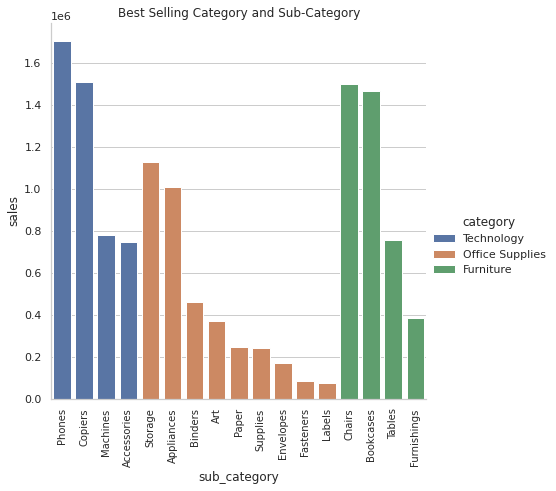

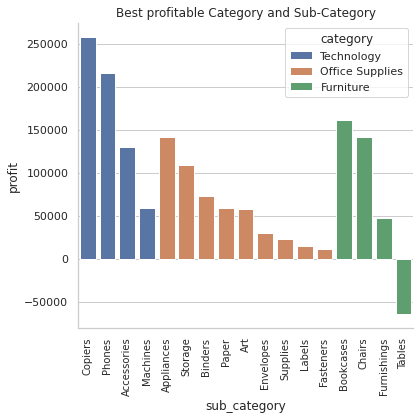

In [41]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1,2, figsize=(15, 10))


cat1 = pd.DataFrame(df.groupby(["category","sub_category"]).sum()["sales"]).reset_index().sort_values(["category","sales"],ascending = False)
sns.catplot(x="sub_category",y="sales",data=cat1,kind="bar",hue="category",height=6,dodge=False,ax=axis[0],legend_out=True)
plt.title("Best Selling Category and Sub-Category")
plt.xticks(rotation="vertical",size =10)


cat2 = pd.DataFrame(df.groupby(["category","sub_category"]).sum()["profit"]).reset_index().sort_values(["category","profit"],ascending = False)
sns.catplot(x="sub_category",y="profit",data=cat2,kind="bar",hue="category",height=6,dodge=False,ax=axis[1],legend_out=False)
plt.title("Best profitable Category and Sub-Category")
plt.xticks(rotation="vertical",size =10)

plt.close(1)

plt.tight_layout()
plt.show()

OBSERVATION : 

TECHNOLOGY has the highest sales Followed by Office supplies and furniture. In technology most of the sales is from phones and copiers whereas in office supplies, storage and appliances have greater sale .In furniture category,chairs and book cases have greater sale

technology is the highest profit making category followed by office supplies and furniture,Tables particularly has negative profit

###NUMBER OF CUSTOMERS SEGMENT WISE AND THEIR PROFITS


In [46]:
Top_segments = df.groupby(["segment"])["profit"].sum().reset_index().sort_values("profit",ascending= False)
Top_segments

,segment,profit
0,Consumer,749239.78206
1,Corporate,442785.85866
2,Home Office,277009.18056


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


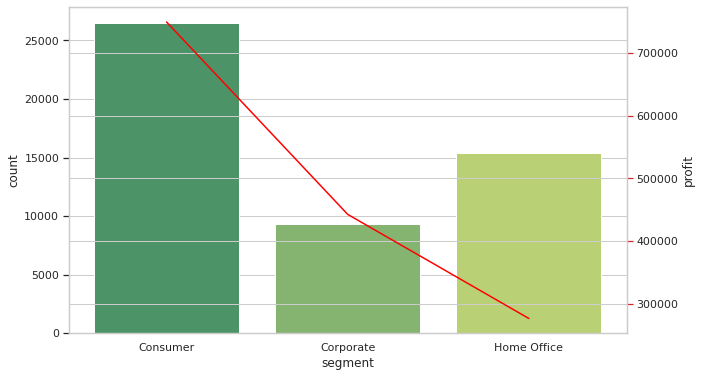

In [47]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1= sns.countplot(df["segment"],palette='summer')

ax2 = ax1.twinx()
color = 'tab:red'
ax2 = sns.lineplot(x='segment', y='profit', data = Top_segments, sort=False, color="red")
ax2.tick_params(axis='y', color=color)

plt.show()

OBSERVATION :
Counsumer segment has the most customers as well as the highest profit, Whereas Home office has larger consumer base than Corporate segment but profit for corporate segment is more than home office

###TOP 5 COUNTRIES BY SALES and profit of those countries

In [48]:
Top_countries = df.groupby(["country"])[['sales',"profit"]].sum().reset_index().sort_values("sales",ascending= False)[:5]



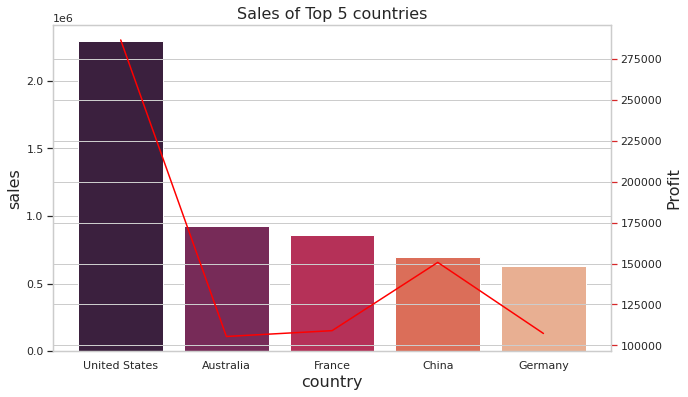

In [49]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'

#bar plot creation
ax1.set_title('Sales of Top 5 countries', fontsize=16)
ax1.set_xlabel('Country', fontsize=16)
ax1.set_ylabel('Sales', fontsize=16)
ax1 = sns.barplot(x='country', y='sales', data = Top_countries, palette='rocket')
ax1.tick_params(axis='y')

#share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

#line plot creation
ax2.set_ylabel('Profit', fontsize=16)
ax2 = sns.lineplot(x='country', y='profit', data = Top_countries, sort=False, color="red")
ax2.tick_params(axis='y', color=color)

#show plot
plt.show()

Observtaion :

United states has the highest profit as well as the highest sales. Whereas Australia and France have sales greater than china,but china has profit more than Australia and france

###REGION WITH MOST SALES AND PROFIT OF THOSE REGIONS

In [54]:
Top_region = df.groupby(["region"])[['sales',"profit"]].sum().reset_index().sort_values("sales",ascending= False)[:5]
Top_region["sales"] = Top_region["sales"].astype(str)
Top_region

,region,sales,profit
3,Central,2822302.519939989,311403.98164
10,South,1600907.0408799918,140355.76618
7,North,1248165.602519999,194597.95252
9,Oceania,1100184.6120000023,121666.64200
11,Southeast Asia,884423.169000002,17852.32900


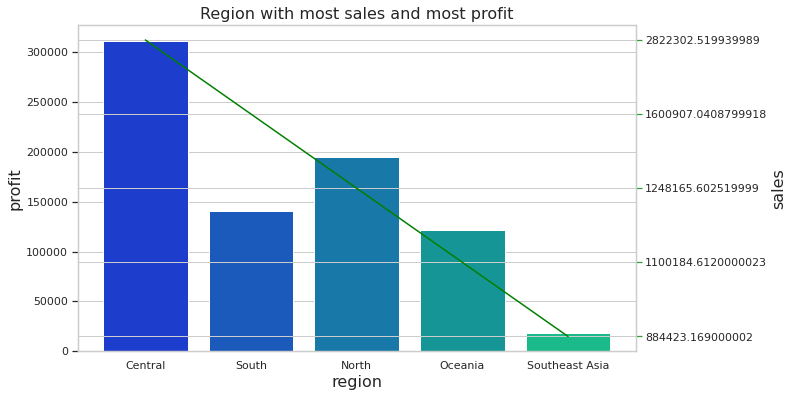

In [55]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1.set_title('Region with most sales and most profit', fontsize=16)
ax1.set_xlabel('Country', fontsize=16)
ax1.set_ylabel('profit', fontsize=16)
ax1 = sns.barplot(x="region",y="profit",data=Top_region,palette="winter")
ax1.tick_params(axis='y')

#share the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'

#line plot creation
ax2 = sns.lineplot(x="region",y="sales",data=Top_region,color = "green")
ax2.set_ylabel('sales', fontsize=16)
ax2.tick_params(axis='y', color=color)
#show plot

plt.show()

OBSERVATION :

Central region has the most sales as well as profit.
Southeast Asia has the minimum sales and profit among top 5.
North region has profit less than the south region but sales of north region is more than South region

### REGION WITH MOST PROFITABLE BUSINESS

In [52]:
Top_region_profit = df.groupby(["region"])["profit"].sum().reset_index().sort_values("profit",ascending= False)[:5]
Top_region_profit

,region,profit
3,Central,311403.98164
7,North,194597.95252
8,North Asia,165578.42100
10,South,140355.76618
4,Central Asia,132480.18700


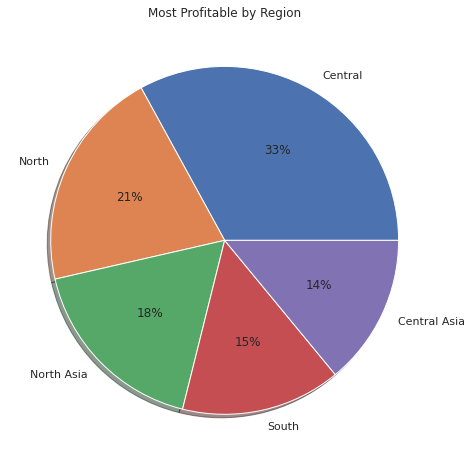

In [53]:
plt.figure(figsize=(8,8))
plt.pie(Top_region_profit.profit, labels = Top_region_profit.region, autopct = "%1.0f%%", shadow = True)
plt.title("Most Profitable by Region")
plt.show()

OBSERVATION : central region has the most profitable business followed by north 

### COUNTRY WITH MAXIMUM DISCOUNT

In [56]:
country_discount = df.groupby(["country"])[["discount","profit"]].sum().reset_index().sort_values("discount",ascending= False)[:5]
country_discount

,country,discount,profit
139,United States,1561.09,286397.0217
133,Turkey,826.80,-98447.2320
94,Nigeria,633.50,-80750.7180
58,Indonesia,413.26,15608.6779
6,Australia,407.20,105484.9630


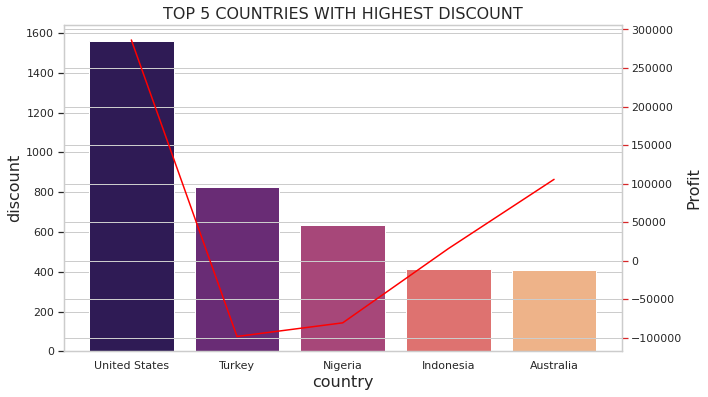

In [57]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
ax1.set_title('TOP 5 COUNTRIES WITH HIGHEST DISCOUNT', fontsize=16)
ax1.set_xlabel('Country', fontsize=16)
ax1.set_ylabel('discount', fontsize=16)
ax1 = sns.barplot(x='country', y='discount', data = country_discount, palette='magma')
ax1.tick_params(axis='y')
#share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('Profit', fontsize=16)
ax2 = sns.lineplot(x='country', y='profit', data = country_discount, sort=False, color="red")
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

OBSERVATION : 
United States offers the most discount and has the highest profit as well.
Nigeria and turkey offer second and third highest discount and their profits is in negative.

###TOP 5 subcategory sales and respective states


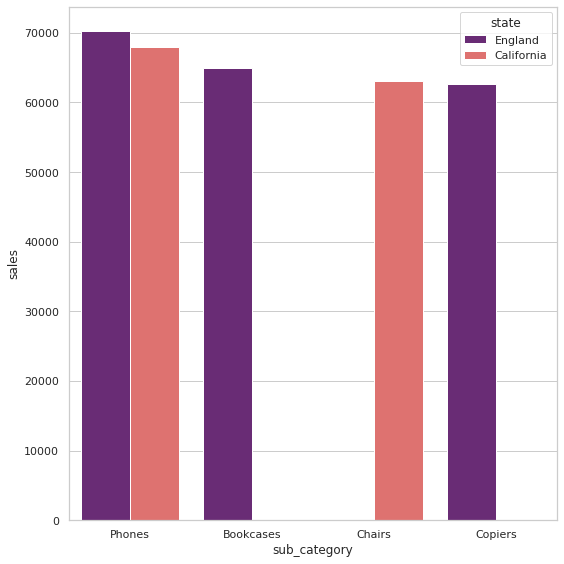

In [143]:
country_city = df.groupby(["state","sub_category"])["sales"].sum().reset_index().sort_values(["sales"],ascending= False)[:5]
plt.figure(figsize=(8,8))
sns.barplot(x="sub_category",y="sales",data=country_city,hue="state",palette="magma")
plt.tight_layout()
plt.show()

Observation:
Phones top the list in sales in england follwed by california.
Bookcases are second most sold item in england, followed by chairs in california and copiers in england 